**Instituto Tecnológico de Costa Rica - TEC**

***Análisis de algoritmos***

*Docente: Kenneth Obando Rodríguez*

---
# Trabajo Corto 1: Experimentos Empíricos y Teóricos
---
Estudiantes:
- Fabián Bustos
- Ian Murillo

Link del Cuaderno (recuerde configurar el acceso a público):

    
- [Link de su respuesta, recuerde estable](https://colab.research.google.com/drive/1B2oXCyLem_yfRUeInnW6kwxa0NNaYkgs?usp=sharing)



    **Nota:** Este trabajo tiene como objetivo promover la comprensión de la complejidad computacional y su importancia en la elección de algoritmos. Los alumnos deben evitar copiar y pegar directamente información de fuentes externas, y en su lugar, demostrar su propio análisis y comprensión.  

## Actividad 1: Experimentos empíricos


En esta tarea, tu objetivo es diseñar y realizar un experimento empírico utilizando el lenguaje de programación Python. El experimento consistirá en investigar el tiempo de ejecución de dos algoritmos diferentes para resolver un problema específico y comparar sus resultados.

### Instrucciones:

Para cada uno de los algoritmos que se le presentan a continuación realice los siguientes pasos:

2. **Implementación:** Implementa dos algoritmos que resolverán el siguiente problema. Asegúrate de que cada algoritmo sea independiente y correcto en su lógica.

---
  Dado un conjunto de cláusulas lógicas en forma normal conjuntiva con *tres literales por cláusula*, el objetivo es determinar si existe una asignación de valores verdadero o falso a las variables booleanas de manera que todas las cláusulas se vuelvan verdaderas.

  Una cláusula consta de tres literales (variables booleanas o su negación) conectados por operadores lógicos OR. El problema se simplifica a solo tres literales por cláusula para facilitar la implementación.

  **Entrada:**

  Un conjunto de cláusulas en forma normal conjuntiva 3-SAT.
  
  **Salida:**

  "Sí" si existe una asignación de valores verdadero o falso a las variables booleanas que hace que todas las cláusulas sean verdaderas.
  "No" si no existe tal asignación.

  Ejemplo:
  ```
  Entrada: (A ∨ ¬B ∨ C) ∧ (¬A ∨ B ∨ ¬C) ∧ (¬A ∨ ¬B ∨ C)
  Salida: Sí (Asignación: A = Verdadero, B = Falso, C = Verdadero)
  ```

  **Restricciones:**

  Cada cláusula contiene exactamente tres literales.
  Las variables booleanas se representan como letras mayúsculas del alfabeto.

---
3. **Generación de Datos de Prueba:** Crea un conjunto de datos de prueba. Deberías tener varios conjuntos de tamaños diferentes para evaluar cómo los algoritmos manejan diferentes escalas de entrada.

4. **Experimento:** Mide el tiempo de ejecución de cada algoritmo para cada conjunto de datos de prueba. Utiliza la función `time` o el módulo `timeit` de Python para medir el tiempo.

5. **Análisis:** Una vez que hayas recopilado los tiempos de ejecución, realiza un análisis comparativo. Grafica los tiempos en función del tamaño del conjunto de datos y saca conclusiones sobre qué algoritmo es más eficiente en términos de tiempo de ejecución.



In [ ]:
{
    'clausula1': {'A': 'Neg', 'B': 'Pos', 'C': 'Neg'},
    'clausula2': {'A': 'Neg', 'B': 'Neg', 'C': 'Neg'},
    'clausula3': {'A': 'Neg', 'B': 'Pos', 'C': 'Neg'},
    ...
    'clausulaN': {'A': 'Neg', 'B': 'Pos', 'C': 'Neg'}

}

In [ ]:
print(34)

34


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import pandas as pd
from tqdm.auto import tqdm
#from apuntes import *
import random

In [126]:
def random_array(n):
    array = []
    dic= {}
    for i in range(1,n+1):
      for j in range(0,3):
        x = random.randint(0,1)
        if len(dic) == 0:
          if x == 0:
            dic["a"] = "pos"
          elif x == 1:
            dic["a"] = "neg"
        elif len(dic) == 1:
          if x == 0:
            dic["b"] = "pos"
          elif x == 1:
            dic["b"] = "neg"
        elif len(dic) == 2:
          if x == 0:
            dic["c"] = "pos"
          elif x == 1:
            dic["c"] = "neg"
      array.append(dic)
      dic = {}
    return array




def prueba_empirica(search_func, array_func, n_max=10000, number=None):
    for n in range(1, n_max):
        if number is None:
            target = 0
        else:
            target = number
        array = array_func(n)
        start_time = time.time()
        iteraciones = search_func(array)
        end_time = time.time()
        yield { 'n': n, 'time': end_time - start_time, 'Iteraciones': iteraciones}

In [127]:
#Versión 1
def logica(lista):
  a = True
  b = True
  c = True
  n = 0
  v = 1
  return logicaAux(lista,a,b,c,n,v)

def logicaAux(lista,a,b,c,n,v):
  if n != len(lista):
    if lista[n]["a"] == "neg":
      a = not a
    if lista[n]["b"] == "neg":
      b = not b
    if lista[n]["c"] == "neg":
      c = not c

    if a == True or b == True or c == True:
      if lista[n]["a"] == "neg":
        a = not a
      if lista[n]["b"] == "neg":
        b = not b
      if lista[n]["c"] == "neg":
        c = not c
      n = n+1
      return logicaAux(lista,a,b,c,n,v)
    else:
      if v == 1:
        a = True
        b = True
        c = False
        v = v+1
        n = 0
        return logicaAux(lista,a,b,c,n,v)
      if v == 2:
        a = True
        b = True
        c = False
        v = v+1
        n = 0
        return logicaAux(lista,a,b,c,n,v)
      if v == 3:
        a = True
        b = False
        c = True
        v = v+1
        n = 0
        return logicaAux(lista,a,b,c,n,v)
      if v == 4:
        a = True
        b = False
        c = False
        v = v+1
        n = 0
        return logicaAux(lista,a,b,c,n,v)
      if v == 5:
        a = False
        b = True
        c = True
        v = v+1
        n = 0
        return logicaAux(lista,a,b,c,n,v)
      if v == 6:
        a = False
        b = True
        c = False
        v = v+1
        n = 0
        return logicaAux(lista,a,b,c,n,v)
      if v == 7:
        a = False
        b = False
        c = True
        v = v+1
        n = 0
        return logicaAux(lista,a,b,c,n,v)
      if v == 8:
        a = False
        b = False
        c = False
        v = v+1
        n = 0
        return logicaAux(lista,a,b,c,n,v)
      else:
        print("No, no hay combinación de valores posible")
  else:
    print("Sí, con la combinación: ", a,",", b,",", c)
  return v


In [128]:
datos = pd.DataFrame(
    tqdm(
        prueba_empirica(logica, random_array, n_max=50)
        )
    )
datos['O(n)'] = datos.n

0it [00:00, ?it/s]

Sí, con la combinación:  True , True , True
Sí, con la combinación:  True , True , True
Sí, con la combinación:  True , True , True
Sí, con la combinación:  True , True , True
Sí, con la combinación:  True , True , False
Sí, con la combinación:  True , False , True
Sí, con la combinación:  True , False , True
Sí, con la combinación:  True , False , True
Sí, con la combinación:  True , True , False
Sí, con la combinación:  True , True , True
Sí, con la combinación:  True , True , True
Sí, con la combinación:  False , True , False
Sí, con la combinación:  False , False , False
Sí, con la combinación:  True , False , False
Sí, con la combinación:  False , False , False
Sí, con la combinación:  False , True , False
Sí, con la combinación:  True , True , True
Sí, con la combinación:  True , False , True
No, no hay combinación de valores posible
Sí, con la combinación:  True , True , True
No, no hay combinación de valores posible
No, no hay combinación de valores posible
Sí, con la combinaci

In [129]:
datos

,n,time,Iteraciones,O(n)
0,1,0.003251,1,1
1,2,0.001775,1,2
2,3,0.001389,1,3
3,4,0.000095,1,4
4,5,0.000093,2,5
5,6,0.000136,4,6
6,7,0.000132,4,7
7,8,0.000117,4,8
8,9,0.000128,2,9
9,10,0.000097,1,10


<Axes: >

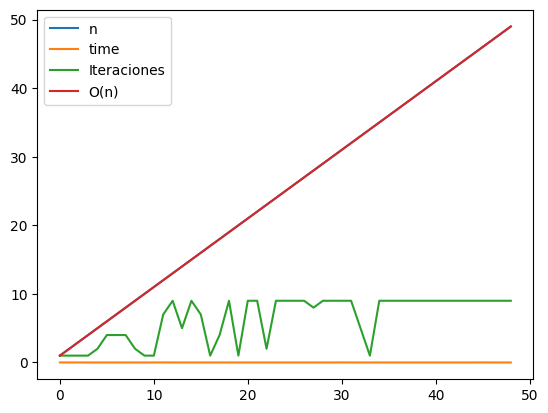

In [130]:
datos.plot()

In [112]:
def random_array(n):
    array = []
    dic= {}
    for i in range(1,n+1):
      for j in range(0,3):
        x = random.randint(0,1)
        if len(dic) == 0:
          if x == 0:
            dic["A"] = "Pos"
          elif x == 1:
            dic["A"] = "Neg"
        elif len(dic) == 1:
          if x == 0:
            dic["B"] = "Pos"
          elif x == 1:
            dic["B"] = "Neg"
        elif len(dic) == 2:
          if x == 0:
            dic["C"] = "Pos"
          elif x == 1:
            dic["C"] = "Neg"
      array.append(dic)
      dic = {}
    return array

def prueba_empirica(search_func, array_func, n_max=10000, number=None):
    for n in range(1, n_max):
        if number is None:
            target = 0
        else:
            target = number
        array = array_func(n)
        start_time = time.time()
        iteraciones = search_func(array)
        end_time = time.time()

        yield { 'n': n, 'time': end_time - start_time, 'Iteraciones': iteraciones}

In [122]:
#Solucion 2 - Fabian Bustos

def readDicc(dicc):
    clauseList = dicc
    #for i in range(1, len(dicc) + 1, 1):
    #    nombreD = dicc[i]
    #    clauseList.append(dicc[i])
    return clauseList

def readClause(clause, valorA, valorB, valorC):
    clasA = clause['A'] == 'Pos'
    clasB = clause['B'] == 'Pos'
    clasC = clause['C'] == 'Pos'
    if not (clasA):
        valorA = not valorA
    if not(clasB):
        valorB = not valorB
    if not (clasC):
        valorC = not valorC

    return (valorA or valorB or valorC)


def evaluarCombi(letras, listaClauses):
    listaResultados = []
    for clause in listaClauses:
        listaResultados.append(readClause(clause, letras[0], letras[1], letras[2]))
    return listaResultados

def revisarResultados(listaR):
    for i in listaR:
        if i == False:
            return False
    return True

def combinatorio(listaClauses):
    letras = [True, True, True]

    tamanno = 2 ** len(letras)
    i = 1
    f = 0
    fAlterno = True
    for i in range(tamanno):
        letras[0] = i < 4
        if f < 2:
            letras[1] = fAlterno
            f += 1
        else:
            f = 0
            fAlterno = not fAlterno
            letras[1] = fAlterno
            f += 1

        letras[2] = (i % 2 == 0)
        listaResultados = evaluarCombi(letras, listaClauses)
        if revisarResultados(listaResultados):
            return letras

    return False

def main(dicc):
    listaD = readDicc(dicc)
    res = combinatorio(listaD)
    if(res == False):
        print("No, no hay combinación de valores posible")
    else:
        print("Si, con la combinacion: ", res)
    return len(listaD)



#dicc = {
#    'clausula1': {'A': 'Pos', 'B': 'Pos', 'C': 'Neg'},
#    'clausula2': {'A': 'Neg', 'B': 'Neg', 'C': 'Neg'},
#    'clausula3': {'A': 'Neg', 'B': 'Pos', 'C': 'Neg'},
#    'clausula4': {'A': 'Neg', 'B': 'Pos', 'C': 'Neg'}
#}

#main(dicc, len(dicc))





In [123]:
datos = pd.DataFrame(
    tqdm(
        prueba_empirica(main, random_array, n_max=20)
        )
    )
datos['O(n)'] = datos.n

0it [00:00, ?it/s]

Si, con la combinacion:  [True, True, True]
Si, con la combinacion:  [True, True, True]
Si, con la combinacion:  [True, True, True]
Si, con la combinacion:  [True, True, True]
Si, con la combinacion:  [True, False, False]
Si, con la combinacion:  [True, True, False]
Si, con la combinacion:  [True, True, True]
Si, con la combinacion:  [True, False, True]
Si, con la combinacion:  [True, True, True]
Si, con la combinacion:  [True, False, False]
Si, con la combinacion:  [True, True, True]
Si, con la combinacion:  [False, False, True]
Si, con la combinacion:  [True, True, True]
Si, con la combinacion:  [True, False, False]
Si, con la combinacion:  [False, False, False]
Si, con la combinacion:  [True, False, False]
No, no hay combinación de valores posible
Si, con la combinacion:  [True, False, False]
Si, con la combinacion:  [False, True, True]


In [124]:
datos

,n,time,Iteraciones,O(n)
0,1,0.003342,0,1
1,2,0.000891,0,2
2,3,0.000914,0,3
3,4,0.000812,0,4
4,5,0.000829,0,5
5,6,0.000619,0,6
6,7,0.000049,0,7
7,8,0.000061,0,8
8,9,0.000045,0,9
9,10,0.000086,0,10


<Axes: >

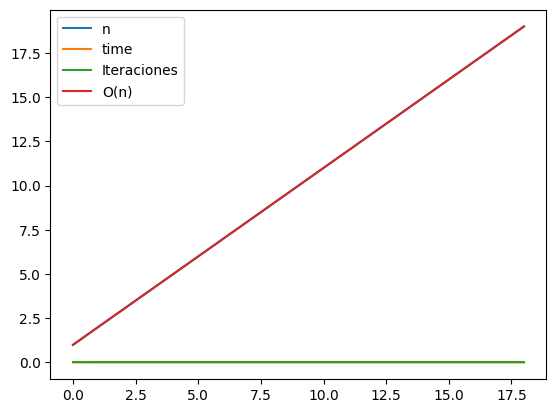

In [125]:
datos.plot()

En conclusión ambos códigos toman más tiempo de ejecución a medida que se añaden más elementos a la lista de diccionarios ya que se requiere, en caso de encontrar un error en alguno de los diccionarios, se requiere volver a revisar cada uno desde el principio hasta encontrar una solución satisfactoria o no, también se nota como despues de una cantidad de entradas es imposible encontrar una solución satidfactoria para todos los casos.

## Actividad 2: Complejidad computacional






El objetivo de este trabajo corto es que los alumnos adquieran una comprensión profunda de la complejidad computacional de diversos algoritmos. Los alumnos deberán analizar y comparar la complejidad temporal (tiempo de ejecución) y espacial (consumo de memoria) de varios algoritmos, y comprender cómo estos factores pueden afectar el rendimiento y eficiencia de los algoritmos en diferentes situaciones.

### Instrucciones


Para cada uno de los algoritmos seleccionados, los alumnos deberán realizar lo siguiente:

1. **Descripción del Algoritmo:** Proporcionar una breve explicación de cómo funciona el algoritmo. Incluir pseudocódigo o diagramas si es necesario para clarificar el proceso.

2. **Complejidad Temporal:** Analizar y calcular la complejidad temporal del algoritmo en el peor caso, mejor caso y caso medio. Explicar cómo se llegó a la fórmula de complejidad y qué factores la determinan.

3. **Complejidad Espacial:** Analizar y calcular la complejidad espacial del algoritmo en términos de consumo de memoria en el peor caso. Identificar las estructuras de datos utilizadas que contribuyen a la complejidad espacial.

4. **Comparación y Conclusión:** Comparar las complejidades temporales y espaciales de los tres algoritmos seleccionados. Discutir cuál algoritmo es más eficiente en diferentes situaciones y por qué. Concluir cómo los resultados del análisis de complejidad pueden influir en la elección de algoritmos en proyectos reales.




### Problema 1:

Tomado de: [LeetCode: 378](https://leetcode.com/problems/kth-smallest-element-in-a-sorted-matrix/description/)

Dado una matriz `n x n` en la que cada una de las filas y columnas está ordenada en orden ascendente, devuelve el `k-ésimo` elemento más pequeño en la matriz.

Ten en cuenta que es el `k-ésimo` elemento más pequeño en el orden ordenado, no el `k-ésimo` elemento distinto.


Ejemplo 1:
```
Input: matrix = [[1,5,9],[10,11,13],[12,13,15]], k = 8
Output: 13
Explanation: Los elementos en la matriz son [1,5,9,10,11,12,13,13,15], y el 8vo número más pequeño es 13
```
Example 2:

```
Input: matrix = [[-5]], k = 1
Output: -5
```

Se deben seguir las restrincciones planteadas en Leetcode


In [ ]:
# Solución 1
def Problema2(matrix,k):
  filas = 0
  columnas = 0
  contador = 0
  lista = []
  while filas!= len(matrix):
    while columnas != len(matrix):
      lista.append(matrix[filas][columnas])
      columnas+=1
      contador+=1
    filas+=1
    columnas = 0
  lista.sort()
  print(lista[k-1])

In [ ]:
# Solución 2 - Fabian Bustos
def insertL(lista, num):
    if(lista == [] or num >= lista[-1]):
        lista.append(num)
    else:
        i = 0
        while(i < len(lista) -1 ):
            if(lista[i] <= num and lista[i+1] > num):
                lista.insert(i+1, num)
                break
            else:
                i += 1
    return lista

def getMatrix(matrix):
    lista = matrix[0]
    i = 1
    while i < len(matrix):
        fila = matriz[i]
        for numero in fila:
            lista = insertL(lista, numero)
        i += 1
    return lista

def kSmallest(matrix, k):
    mList = getMatrix(matrix)
    if(k <= len(mList)):
        print("Los elementos de la matriz son ", mList, "y el ", k,"vo elemento más pequeño es ", mList[k-1])
    else:
        print("Rango de k fuera de lista")

matriz = [[1, 5, 9],
          [10, 11, 13],
          [12, 13, 15]
        ]

kSmallest(matriz, 4)

Los elementos de la matriz son  [1, 5, 9, 10, 11, 12, 13, 13, 15] y el  4 vo elemento más pequeño es  10


**Solución 1:**
  1. Descripción:
El algoritmo recibe una matriz y un número "k" que indica cual elemento a buscar, se desea encontrar cual es el elemento de menor valor en la posición k de la matriz, para esto, el algoritmo ordena los elementos de la matriz en una lista, para luego ordenar la lista y trasladarse a la posición solicitada a devolver el elemento deseado





###Solución 2:
1. Descripcion:

El algoritmo consiste de dos partes principales, insertL() y getMatrix().

-insertL() inserta un número de manera ordenada en una lista, si se encuentra un elemento repetido lo inserta en la posicióna adyacente.

-getMatrix() recorre la matriz fila por fila, invocando a insertL. El procedimiento comienza inicializando la lista donde se van a insertar los valores con la primera fila de la matriz. Después el resto de los elementos se le agregaran de manera ordenada a esta matriz.

2. Complejidad Temporal:
  - insertL: para esta funciómn del algoritmo, el mejor caso sería si la matriz viene ordenada de manera que el mayor de cada fila sea menor que el de la siguiente, de esta manera todas las inserciones se harían mediante el if del append. La complejidad de este resultaría en O(1). El peor caso del algoritmo sería tener que insertar elementos en la penúltima posición, ya que se debe recorrer prácticamente toda la lista hasta realizar la inserción, resultando en O(n).

  - getMatrix: considerando que el peor caso de esta función se le agregaría el peor caso de insertL, y este es O(n), y que la función en si recorre la matriz, el peor caso sería O(2n^2). EL mejor caso sería si la matriz solo tiene un elemento, en cuyo caso el costo sería O(2n)







### Problema 2:

Tomado de: [LeetCode: 33](https://leetcode.com/problems/search-in-rotated-sorted-array/)

Hay un arreglo de enteros `nums` ordenado en orden ascendente (con valores distintos).

Antes de ser pasado a tu función, `nums` posiblemente ha sido rotado en un índice de pivote desconocido `k` (`1 <= k < nums.length`) de manera que el arreglo resultante es `[nums[k], nums[k+1], ..., nums[n-1], nums[0], nums[1], ..., nums[k-1]]` (indexado desde 0). Por ejemplo, `[0,1,2,4,5,6,7]` podría ser rotado en el índice de pivote `3` y convertirse en `[4,5,6,7,0,1,2]`.

Dado el arreglo `nums` después de la posible rotación y un entero `target`, devuelve el índice del `target` si está en `nums`, o `-1` si no está en `nums`.


Ejemplo 1:
```
Entrada: nums = [4,5,6,7,0,1,2], objetivo = 0
Salida: 4
```
Ejemplo 2:
```
Entrada: nums = [4,5,6,7,0,1,2], objetivo = 3
Salida: -1
```
Ejemplo 3:
```
Entrada: nums = [1], objetivo = 0
Salida: -
```

In [ ]:
# Solución 1
def Problema3(lista, k):
  i = len(lista)//2
  while i!= len(lista):
    if i == 0 and lista[i] != k:
      print("-1")
      break
    if lista[i]==k:
      print("El número se encuentra en el valor: ", i)
      break
    else:
      if lista[i]<lista[i-1]:
        i+=1
      else:
        if k<=lista[i] and k>lista[0]:
          i-=1
        elif k<=lista[i] and k<=lista[len(lista)-1]:
          i+=1
        else:
          print("-1")
          break

In [ ]:
# Solución 2 - Fabián Bustos

def busquedaLista(lista, num):
    j = 0
    for i in lista:
        if i == num:
            return i
        j += 1
    return -1

def mainLista(lista, num):
    resultado = busquedaLista(lista, num)
    print(resultado)

nums = [4,5,6,7,0,1,2]
objetivo = 3


mainLista(nums, objetivo)

**Solución 1:**
  Descripción:
El algoritmo busca encontrar un elemento en una lista previamente rotada según un pivote, para ello, el algoritmo realiza una clase de busqueda binaria, comenzando en el centro aproximado (en caso de no ser exacto) de la lista y avanzando hacia adelante o hacia atras, buscando el pivote para de ahí trasladarse al frente o atras buscando el elemento según el rango en que se encuentre.


##Solucion 2 Analisis

El algoritmo recorre la lista y si encuentra el número ingresado, devuelve el índice indicado.

####Complejidad Temporal:
El mejor caso del algoritmo sería si el elemento por buscar se encuentra en el primer índice de la lista, en este caso la complejidad sería O(1). El peor caso sería si el elemento no se encuentra en la lista. En este caso se devuelve -1 pero tendría que recorrer toda la lista, por lo que el costo sería  O(n)
